# 1 ENTROPY

- Measure of uncertainty of a random variable $X$. The higher the entropy, the more the uncertainty i.e. more privacy and vice-versa.
- Discrete Entropy applies to Discrete Random Variables whilst Differential Entropy applies to  Continuous Random Variables.


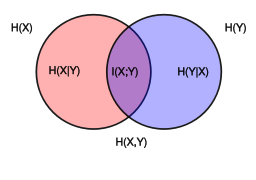
Venn diagram showing additive and subtractive relationships of various information measures associated with correlated variables {\displaystyle X}X and {\displaystyle Y}Y. The area contained by both circles is the joint entropy {\displaystyle \mathrm {H} (X,Y)}{\displaystyle \mathrm {H} (X,Y)}. The circle on the left (red and violet) is the individual entropy {\displaystyle \mathrm {H} (X)}{\displaystyle \mathrm {H} (X)}, with the red being the conditional entropy {\displaystyle \mathrm {H} (X\mid Y)}{\displaystyle \mathrm {H} (X\mid Y)}. The circle on the right (blue and violet) is {\displaystyle \mathrm {H} (Y)}{\displaystyle \mathrm {H} (Y)}, with the blue being {\displaystyle \mathrm {H} (Y\mid X)}{\displaystyle \mathrm {H} (Y\mid X)}. The violet is the mutual information {\displaystyle \operatorname {I} (X;Y)}\operatorname {I} (X;Y).



## 1.1 Discrete Entropy (Discrete Random Variables)
- Let $X$ be a discrete random variable with alphabet $X$ and probability mass function $p(x) = Pr({X = x})$, $x \epsilon X$.
- The entropy $H(X)$ of a discrete random variable $X$ is defined by
$$H(X) = -\sum_{x \epsilon X}^n p(x) log p(x)$$

- NB: The log is to the base 2 and entropy is expressed in bits.
- $H(X) \geqslant 0$
- Conditioning reduces entropy (see section on conditional entropy) i.e. $H(X|Y) \leqslant H(X)$


In [1]:
'''
Calculation of entropy from first principles

For example, we will show that the entropy of a fair coin toss is 1 bit.

Let X be the outcome of a coin toss - {H,T}
P(X) = 0.5 for each outcome since it is a fair coin

----|----|----|
X   |  H | T  |
----|----|----|
P(x)| 0.5|0.5 |
----|----|----|

'''
import math

#calculating discrete entropy from first principles (alternative would be to use
#scipy library
LOG_BASE_2 = 2
OUTCOMES = ['H', 'T']
DISTRIBUTION = [0.5, 0.5]
entropy_H_X = -( sum( (i * math.log(i, LOG_BASE_2)) for i in DISTRIBUTION ) )
print('Entropy of fair coin toss is %s bit' % entropy_H_X)

#manual calculation
entropy_H_X_test = -( (0.5 * math.log(0.5, 2)) + (0.5 * math.log(0.5, 2)) )
print('Manual check of Entropy of fair coin toss is %s bit' % entropy_H_X_test)

Entropy of fair coin toss is 1.0 bit
Manual check of Entropy of fair coin toss is 1.0 bit


In [2]:
'''Using scipy to calculate the entropy of a fair coin toss which is 1 bit.

i.e. a Bernoulli trial with same p (0.5 Heads, 0.5 Tails). The outcome of a fair coin is the most uncertain unlike 
one in which the coin is not fair p (0.9 Heads, 0.1 Tails)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#:~:text=Calculate%20the%20entropy%20of%20a,)%2C%20axis%3Daxis)%20.
Calculate the entropy of a distribution for given probability values.

If only probabilities pk are given, the entropy is calculated as S = -sum(pk * log(pk), axis=axis).

If qk is not None, then compute the Kullback-Leibler divergence S = sum(pk * log(pk / qk), axis=axis)
Parameters
pk: sequence of prior probabilities
Defines the (discrete) distribution. pk[i] is the (possibly unnormalized) probability of event i.

qk: sequence of posterior probabilities, optional
Sequence against which the relative entropy is computed. Should be in the same format as pk.

basefloat, optional
The logarithmic base to use, defaults to e (natural logarithm).

axis: int, optional
The axis along which the entropy is calculated. Default is 0.

Returns
Sfloat
The calculated entropy.'''

from scipy.stats import entropy

#The outcome of a fair coin is very uncertain:
scipy_discrete_fair_entropy = entropy([1/2, 1/2], base=2)
print('scipy libary calculation of Entropy for a fair coin toss is %s bit' % scipy_discrete_fair_entropy)

#The outcome of a biased coin is less uncertain:
scipy_discrete_biased_entropy = entropy([9/10, 1/10], base=2)
print('scipy libary calculation of Entropy for a biased coin toss is %s bit' % scipy_discrete_biased_entropy)

#Relative entropy
scipy_relative_biased_entropy = entropy([1/2, 1/2], qk=[9/10, 1/10])
print('scipy libary calculation of relative entropy of a biased coin toss is %s bit' % scipy_relative_biased_entropy)


scipy libary calculation of Entropy for a fair coin toss is 1.0 bit
scipy libary calculation of Entropy for a biased coin toss is 0.46899559358928117 bit
scipy libary calculation of relative entropy of a biased coin toss is 0.5108256237659907 bit


### 1.1.1 Conditional Entropy and Mutual Information  (Discrete Random Variables)
- Conditional entropy is the entropy of a random variable that is conditional on the knowledge of another.
- Conditioning reduces entropy i.e. $H(X|Y) \leqslant H(X)$
- Reduction in uncertainity due to another random variable is called Mutual Information(which is denoted as $I$)
- For 2 random variables, $X$ & $Y$:
$$ I(X;Y) = H(X) - H(X|Y) = \sum_{x, y}^n p(x,y) log \frac{p(x,y)}{p(x)p(y)} $$

-Mutual information $I(X;Y)$ is a measure of dependence between 2 random variables, is symmetric, always non-negative and is zero if $X$ & $Y$ are independent. In the case of privacy applications, we want mutual information to be as low or close to zero as possible.


## 1.2 Differential Entropy (Continuous Random Variables)
- Differential entropy differs from normal or absolute entropy in that the random variable need not be discrete.
- Interpretation of $h(X)$ is the measure for amount of information we do not have about X
- Let X be a continuous random variable with cumulative distribution function $F(x) = Pr(X \leqslant x)$ and probability density function $f(x)$ i.e. the PDF for $X$ is the first derivative of $F(x)$ which can be written as $F^\prime(x)$.
- The differential entropy $h(X)$ of a continuous random variable $X$ with density $f(x)$ is defined as 
$$h(X) = -\int_S f(x) log f(x) \delta x$$
where $S$ is the support set of the random variable (i.e. where $f(x) > 0)$

- Example (Uniform distribution) - Consider a continuous random variable, $X$, distributed uniformly from $0$ to $a$, with $a$ > 0 and density  $f(x)$ is $1/a$ from 0 to $a$ and 0 elsewhere. Then its differential entropy of $X$ is
$$h(X) = -\int_0^a \frac{1}{a} log \frac{1}{a} \delta x$$

- Differential entropy can be negative


### 1.2.1 Joint Differential Entropy
- The differential entropy of a set $X_{1}, X_{2},...X_{n}$ of continuous random variables with density $f(x_{1}, x_{2},...,x_{n})$ is
$$h(X_{1}, X_{2},...X_{n}) = -\int f(x^n) log f(x^n) \delta x^n $$

### 1.2.2 Conditional Differential Entropy
- The differential entropy of a set $X, Y$ of continuous random variables with a joint density function $f(x, y)$ is
$$h(X|Y) = -\int f(x,y) log f(x|y) \delta x \delta y $$

which can also be written as $h(X|Y) = h(X,Y) - h(Y)$ since generally bayes suggests that $f(x|y) = \frac{f(x,y)}{f(y)}$

### 1.2.3 Relative Entropy and Mutual Information
- The relative entropy (Kullback-Leibler divergence) between two continuous densities $f$ and $g$ measures the difference between two probbility distributions and is given by
$$ D(f||g) = \int f log \frac{f}{g}$$
- The main interpretation of relative entropy is that the information we gained about $X$, if we originally thought $X ∼ g$ and now we learned X ∼ $p$ i.e. Expressed in the language of Bayesian inference, $D(f||g)$ is a measure of the information gained by revising one's beliefs from the prior probability distribution $g$ to the posterior probability distribution $p$.  In order to find a distribution $g$ that is closest to $f$, we can minimize KL divergence and compute an information projection.

### 1.2.4 Mutual Information (Information Gain)
Mutual information is a distance between two probability distributions. Correlation is a linear distance between two random variables. Mutual Information is also known as information gain.

In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (in units such as shannons (bits), nats or hartleys) obtained about one random variable through observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.

Intuitively, mutual information measures the information that {\displaystyle X}X and {\displaystyle Y}Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if {\displaystyle X}X and {\displaystyle Y}Y are independent, then knowing {\displaystyle X}X does not give any information about {\displaystyle Y}Y and vice versa, so their mutual information is zero. At the other extreme, if {\displaystyle X}X is a deterministic function of {\displaystyle Y}Y and {\displaystyle Y}Y is a deterministic function of {\displaystyle X}X then all information conveyed by {\displaystyle X}X is shared with {\displaystyle Y}Y: knowing {\displaystyle X}X determines the value of {\displaystyle Y}Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in {\displaystyle Y}Y (or {\displaystyle X}X) alone, namely the entropy of {\displaystyle Y}Y (or {\displaystyle X}X). Moreover, this mutual information is the same as the entropy of {\displaystyle X}X and as the entropy of {\displaystyle Y}Y. (A very special case of this is when {\displaystyle X}X and {\displaystyle Y}Y are the same random variable.)


- Definition 1: The mutual information $I(X;Y)$ between two continuous random variables  $X$ & $Y$ is given by
$$ I(X;Y) = h(X) - h(X|Y) = h(Y) - h(Y|X) $$


-  Definition 2: The mutual information $I(X;Y)$ between two continuous random variables with joint density $f(x,y)$ is given by
$$ I(X;Y) = \int f(x,y) log \frac{f(x,y)}{f(x)f(y)} \delta x \delta y = E\left[log\frac{f(X,Y)}{f(X)f(Y)}\right]$$


**Mutual information versus correlation**

A measure used to represent how strongly two random variables are related known as correlation. Measures of correlation include covariance, correlation coefficient (a correlation coefficient is a quantitative assessment that measures both the direction and the strength of this tendency to vary together. Values can range from -1 to +1. -1 is an extremely strong negative relationship, 0 is no relationship, +1 is a very strong positivie relationship) etc. 

Mutual information is a distance between two probability distributions. Correlation is a linear distance between two random variables.

In these two plots the correlation coefficient is zero - Pearson’s correlation coefficients measure only linear relationships so if your data contain a curvilinear relationship, the correlation coefficient will not detect it. For example, the correlation for the data in the scatterplot below is zero. However, there is a relationship between the two variables—it’s just not linear. But we can get high shared mutual information even when the correlation is zero - just because the coefficient is near zero, it doesn’t necessarily indicate that there is no relationship.

In the first, I see that if I have a high or low value of X then I'm likely to get a high value of Y. But if the value of X is moderate then I have a low value of Y. The first plot holds information about the mutual information shared by X and Y. In the second plot, X tells me nothing about Y.

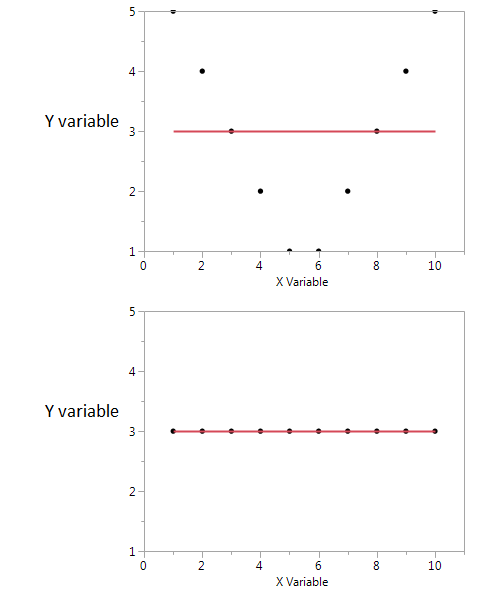

Mutual information and correlation are not antagonistic—they are complementary, describing different aspects of the association between two random variables. Loosely, Mutual Information "is not concerned" whether the association is linear or not, while Covariance may be zero and the variables may still be stochastically dependent. On the other hand, Covariance can be calculated directly from a data sample without the need to actually know the probability distributions involved (since it is an expression involving moments of the distribution), while Mutual Information requires knowledge of the probability distributions.

In [17]:
'''
Estimating differential entropy
Estimate entropy exercies, for each, for each, 
estimate the entropy based on samples of 4 different sizes i.e. N: 10,100,1000,10000.
1. Uniform distribution on the interval [0, 1].
2. Uniform distribution on the interval [0, 8].
3. Uniform distribution on the interval [0, 0.5].
4. Gaussian distribution with mean 0 and standard deviation 1.
5. Gaussian distribution with mean 0 and standard deviation 100.
6. Exponential distribution with mean 1.
7. Exponential distribution with mean 100.

Parametric statistics are based on assumptions about the distribution of population from 
which the sample was taken. Nonparametric statistics are not based on assumptions, that is, 
the data can be collected from a sample that does not follow a specific distribution.
'''

SAMPLE_SIZES = [10,100,1000,10000]

#list to store monte carlo simulation entropies
entropy_monte_carlo = []


#create distribution
xs = []

#create standard deviation for distribution 
sigma = 1

def samplingEntropyEst(xs, N, sigma):
    '''
    Since differential entropy is an expectation (of the negative log probability density), 
    we can estimate it by sampling from a distribution and forming an empirical average of the 
    negative log probability density. This empirical average will converge to the 
    true differential entropy by the law of large numbers.

    Params:
    xs is the sample points in the distribution
    N is the number of times to sample in the Monte Carlo procedure
    sigma is the standard deviation of the sample - need to find a way of generating an 
    optimal sigma
    '''
    pass

for N in SAMPLE_SIZES:
    entropy_monte_carlo.append(samplingEntropyEst(xs, N, sigma))

def mspacingEntropyEst(xs):
    '''
    m−spacings estimate of entropy.
    One way of choosing m  is to use the nearest integer value to the square root of N, the
    number of sample points.

    Params:
    xs is the sample points in the distribution
    '''
    pass

entropy2 = mspacingEntropyEst(xs)

## Synthetic Data Generation
Synthetic data is information that's artificially manufactured (created by an automated process which contains many of the statistical patterns of an original dataset) rather than generated by real-world events. Synthetic data is created algorithmically, and it is used as a stand-in for test datasets of production or operational data, to validate mathematical models and, increasingly, to train machine learning models. It is also sometimes used as a way to release data that has no personal information in it, even if the original did contain personally identifiable information. 

Links:

https://stackoverflow.com/questions/38711541/how-to-compute-the-probability-of-a-value-given-a-list-of-samples-from-a-distrib

https://cran.r-project.org/web/packages/sdglinkage/vignettes/Synthetic_Data_Generation_and_Evaluation.html

https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae

https://mostly.ai/2020/10/28/comparison-of-synthetic-data-types/

https://pypi.org/project/sdgym/

https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/

https://www.kdnuggets.com/2019/09/scikit-learn-synthetic-dataset.html

https://github.com/theodi/synthetic-data-tutorial

https://towardsdatascience.com/synthetic-data-vault-sdv-a-python-library-for-dataset-modeling-b48c406e7398


### Estimating Density for Continuous Data using Kernel Density Estimation 

One method for non-parametric estimation of a probability density function (PDF) for continuous random variables is the histogram. However, as you will see below, Kernel Density Estimation (KDE) can be better. 

Kernel density estimation (KDE) is a non-parametric method for estimating the probability density function of a given random variable. KDE works best when data distribution is not specified or the parameters (e.g. mean, mode. variance) are not specified. It is also referred to by its traditional name, the Parzen-Rosenblatt Window method, after its discoverers.

Notes:
- KDE assumes a sample of independent, identically distributed (i.i.d) observations 
- For a continuous distribution the probability of any exact point is supposed to be zero.



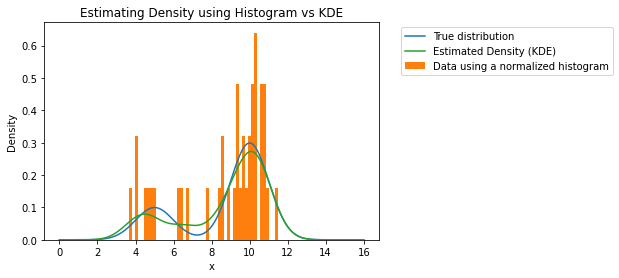

In [14]:
'''
Modelling data as a continuous distribution
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.neighbors import KernelDensity

# Generate random samples from a mixture of 2 Gaussians
# with modes at 5 and 10
# np.random.randn returns a sample (or samples) from the “standard normal” distribution.
data = np.concatenate((5 + np.random.randn(10, 1),
                       10 + np.random.randn(30, 1)))

# Plot the true distribution
x = np.linspace(0, 16, 1000)[:, np.newaxis]
norm_vals =norm.pdf(x, 5, 1) * 0.25 + norm.pdf(x, 10, 1) * 0.75
plt.plot(x, norm_vals, label='True distribution')

# Plot the data using a normalized histogram
plt.hist(data, 50, density=True, label='Data using a normalized histogram')

# Do kernel density estimation. The parameters you can tune in case of KDE are the kernel and the bandwidth
kd = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(data)

# Plot the estimated densty
kd_vals = np.exp(kd.score_samples(x))
plt.plot(x, kd_vals, label='Estimated Density (KDE)')

# Add labels
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Estimating Density using Histogram vs KDE")

# Position legend
# position legend outside the plot using bbox_to_anchor (i.e. bounding box)
legend = plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# legend.get_frame().set_facecolor('C0') # Put a nicer background color on the legend.

# Show the plots
plt.show()

In [ ]:
'''
Alternative modelling of a continuous distribution. Instead of using a parametric approach where you assume that your 
data has some distribution and then fit that distribution to your data, you should take a non-parametric approach. 
One straightforward way is to use a kernel density estimate. You can simply think of this as a way of smoothing a 
histogram to give you a continuous probability density function. 
'''

import scipy.stats
kde = scipy.stats.gaussian_kde(samples)
kde.pdf(2)


# To get the probability of an observation in some interval:
kde.integrate_box_1d(1,2)
#0.13855869478828692

### Estimating Density for Discrete Data using Kernel Density Estimation 

Kernel Density Estimation is a non-parametric technique which works best when data distribution is not specified or the parameters (e.g. mean, mode. variance) are not specified. For discrete data, one could also  simply count the occurrences and divide by the total number of events to get estimates for the probabilities, anywhere where there are have zero observations, our estimate for the probability is zero. 

In [15]:
'''
Modelling data as a discrete distribution given a discrete sample space and all positive integers. 
We simply count the occurrences and divide by the total number of events to get estimates for the probabilities. 
Anywhere we have zero observations, our estimate for the probability is zero.
'''

'\nModelling data as a discrete distribution given a discrete sample space and all positive integers. \nWe simply count the occurrences and divide by the total number of events to get estimates for the probabilities. \nAnywhere we have zero observations, our estimate for the probability is zero.\n'